In [1]:
#Load the data
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
#!pip install scorecardpy

In [2]:
# Importing relevant libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV


In [3]:
# Suppress Warning message
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [5]:
#Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/mushrooms.csv')

In [6]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
# Summary of dataset
print("Dataset Summary:")
print(df.info())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-c

In [8]:
df.describe(include = ['O'])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
#check for null values
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [10]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [11]:
df.shape

(8124, 23)

In [12]:
print("Missing Values Summary:")
print(df.isnull().sum())


Missing Values Summary:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [26]:
# Encode categorical features for correlation computation
label_encoders = {}
encoded_data = df.copy()
for column in df.columns:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [27]:
from sklearn.preprocessing import LabelEncoder
encoded_df = df.copy()
for col in df.columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(df[col])

### **Class Distribution**

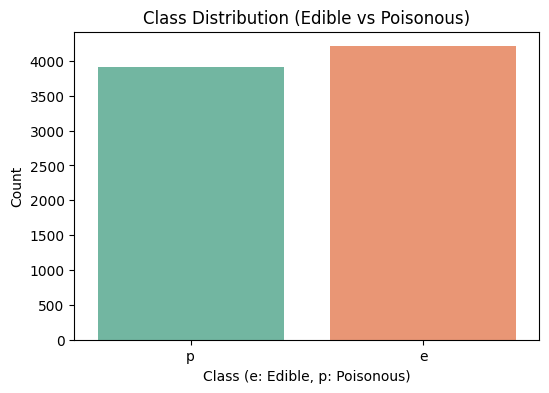

In [13]:
# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='Set2')
plt.title("Class Distribution (Edible vs Poisonous)")
plt.xlabel("Class (e: Edible, p: Poisonous)")
plt.ylabel("Count")
plt.show()

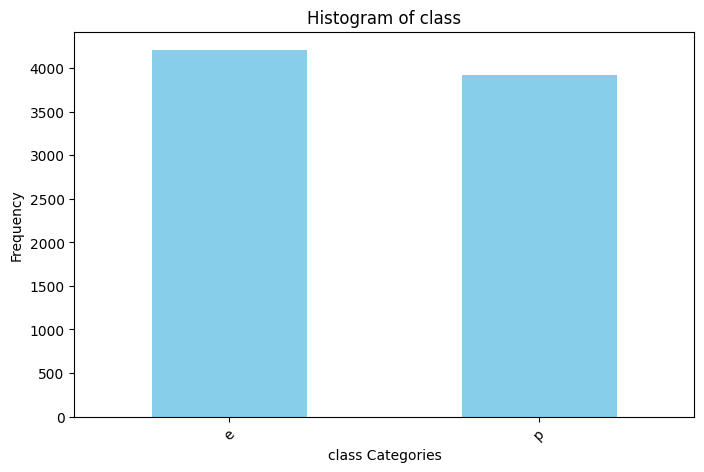

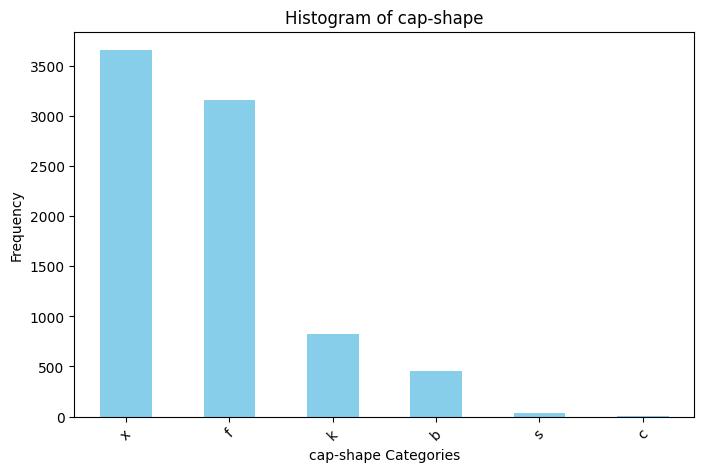

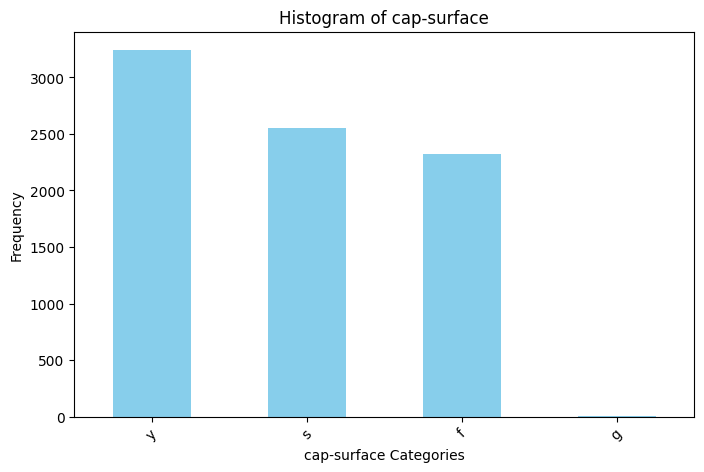

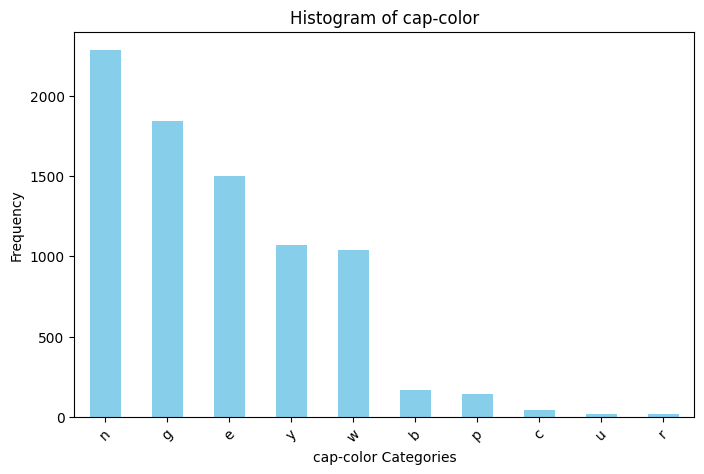

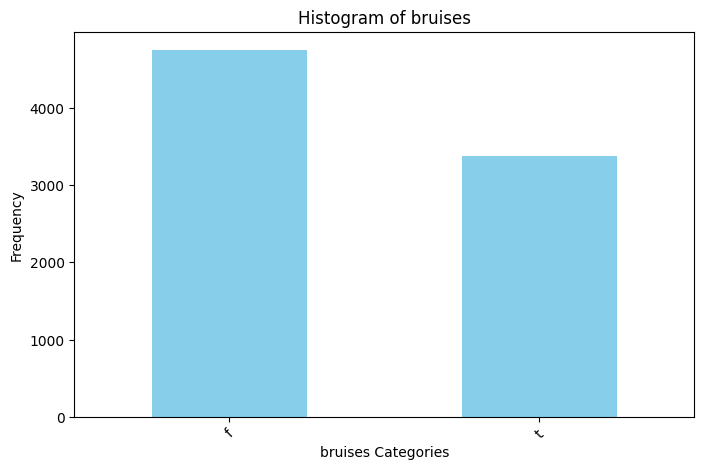

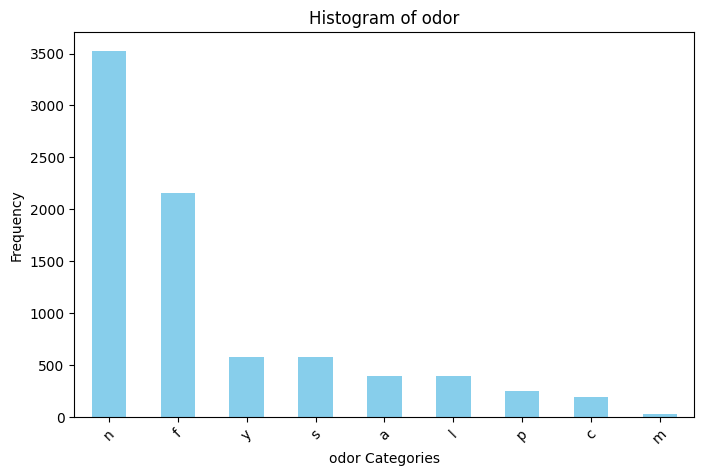

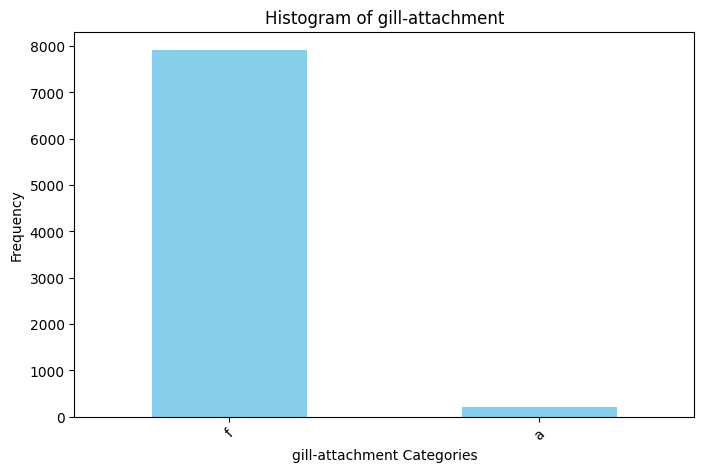

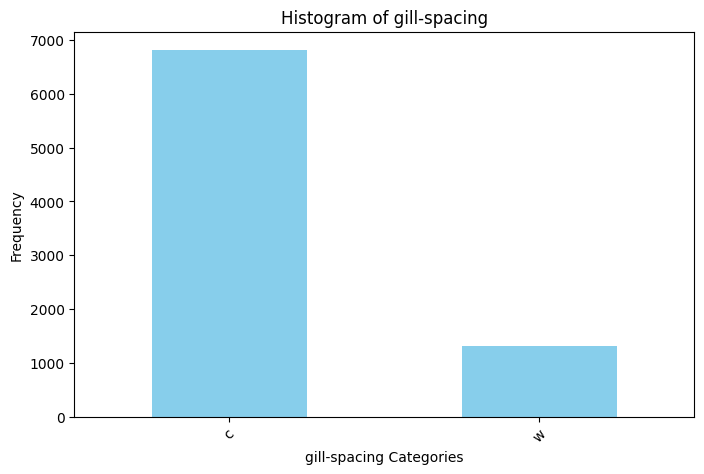

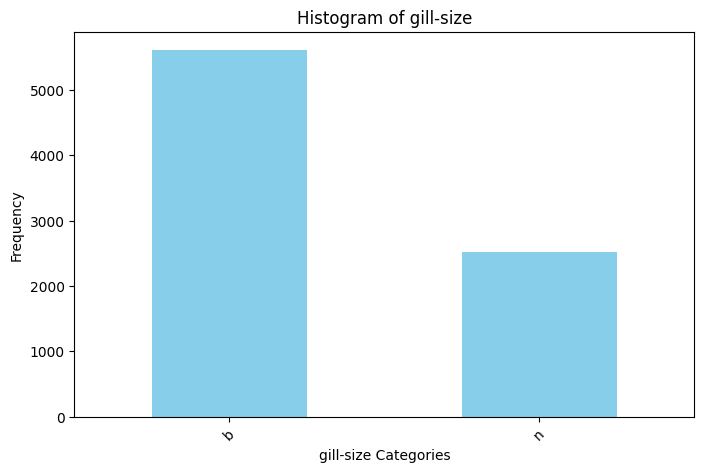

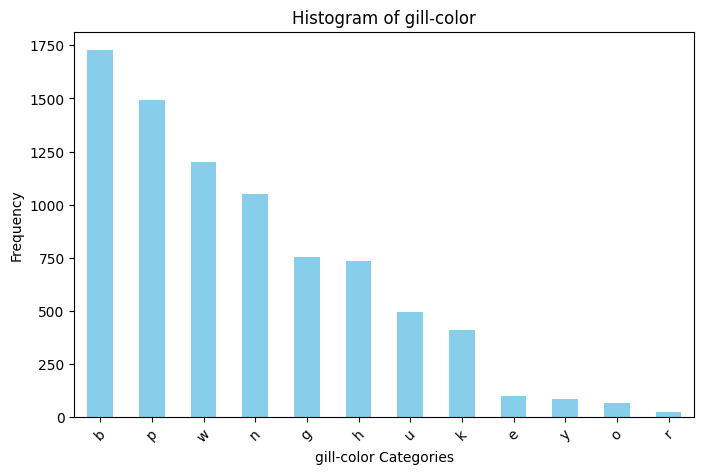

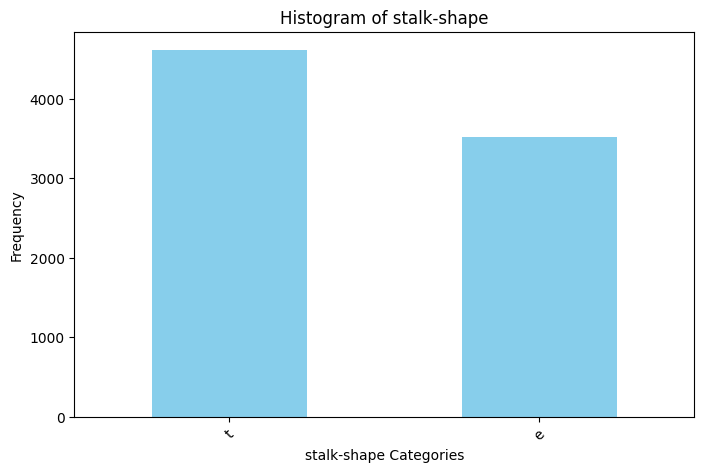

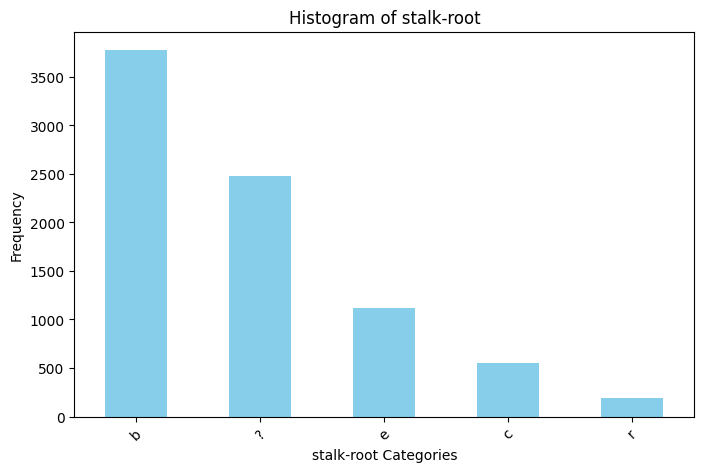

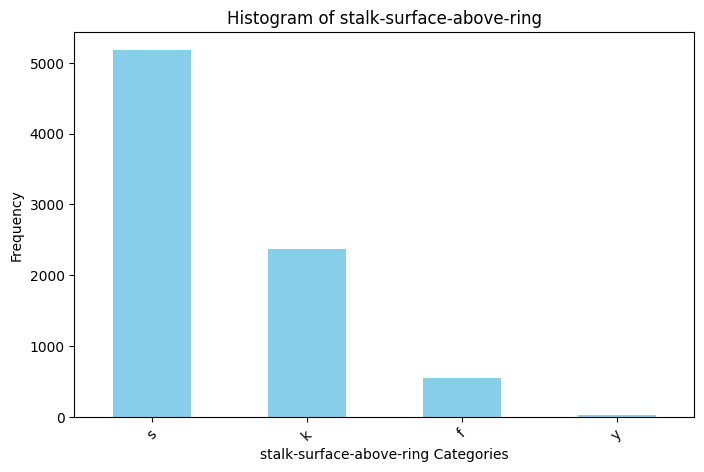

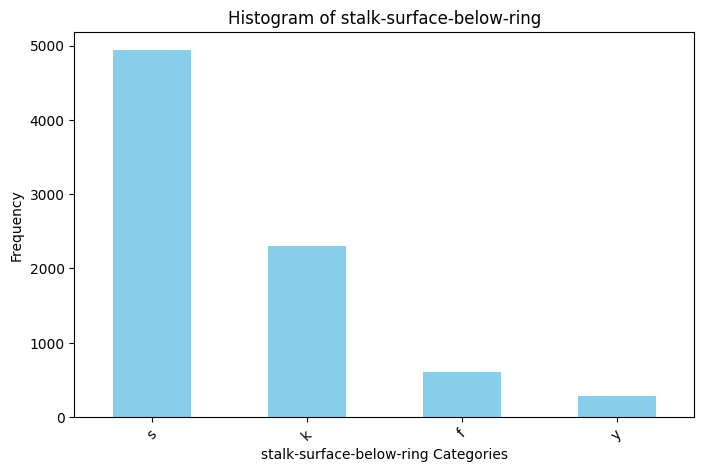

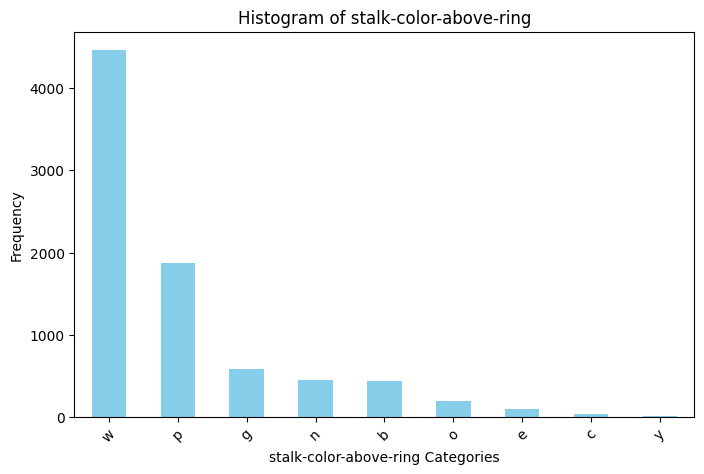

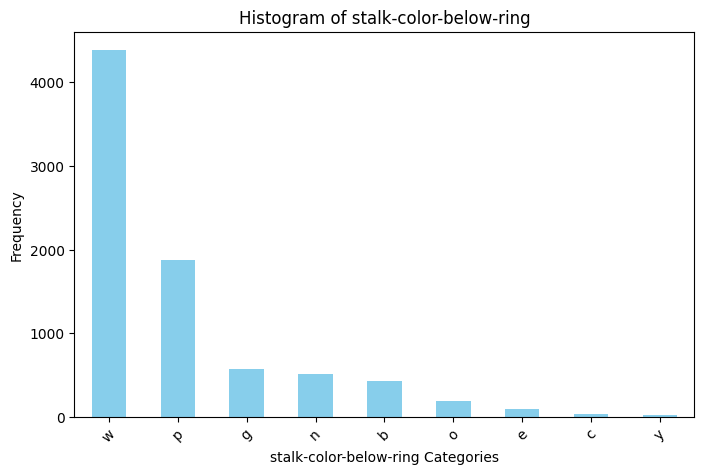

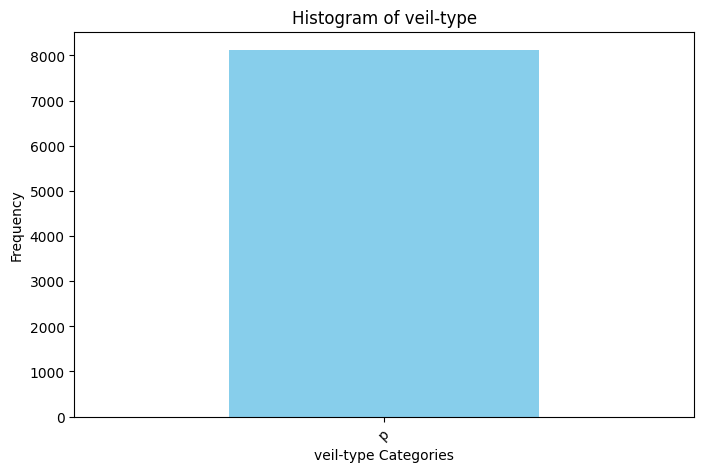

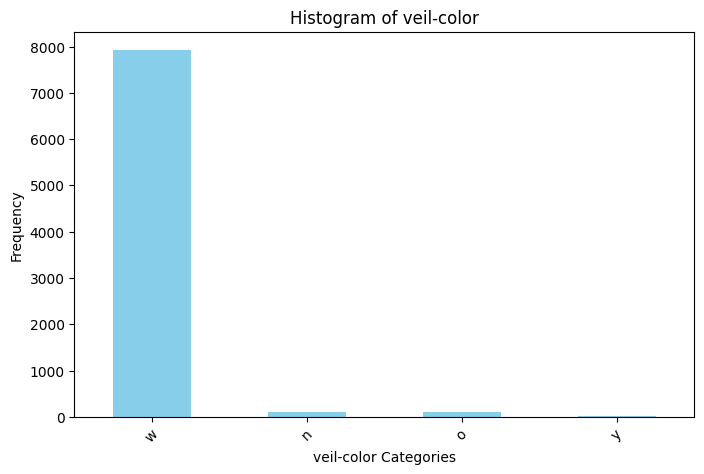

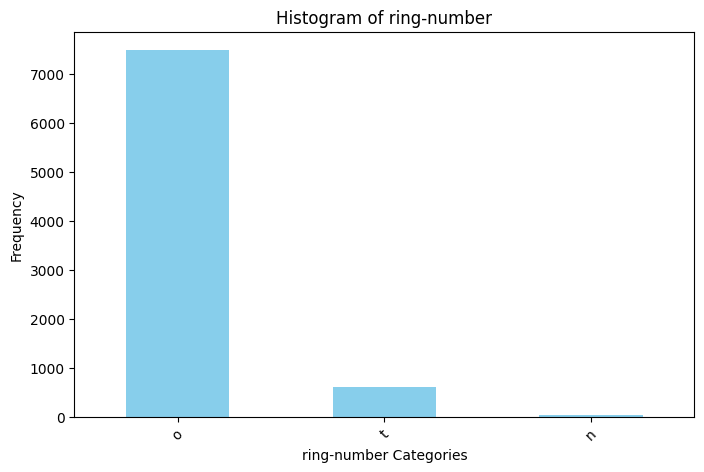

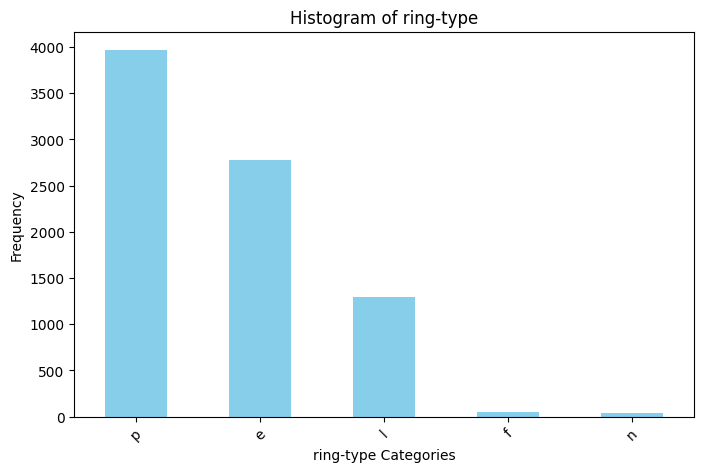

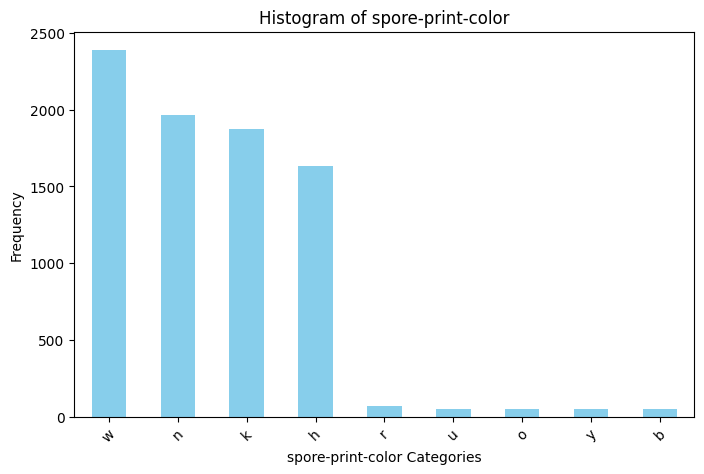

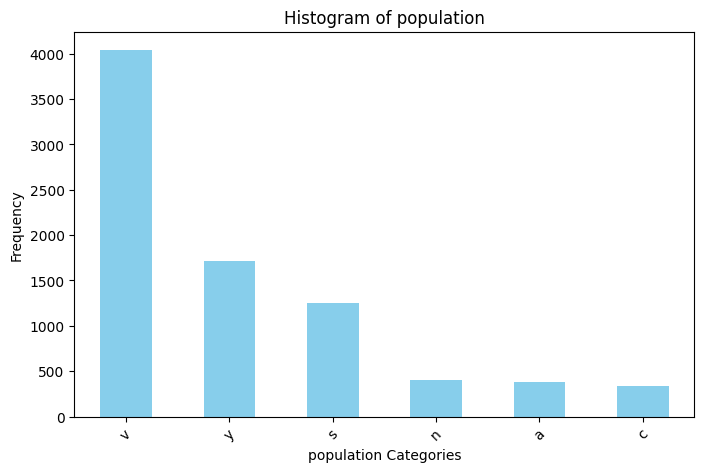

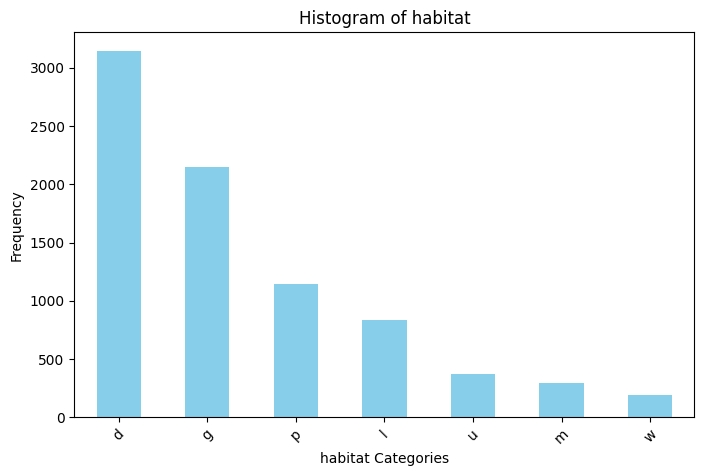

In [14]:
import matplotlib.pyplot as plt

# Plot histograms for categorical variables
for column in df.columns:
    plt.figure(figsize=(8, 5))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Histogram of {column}")
    plt.xlabel(f"{column} Categories")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()


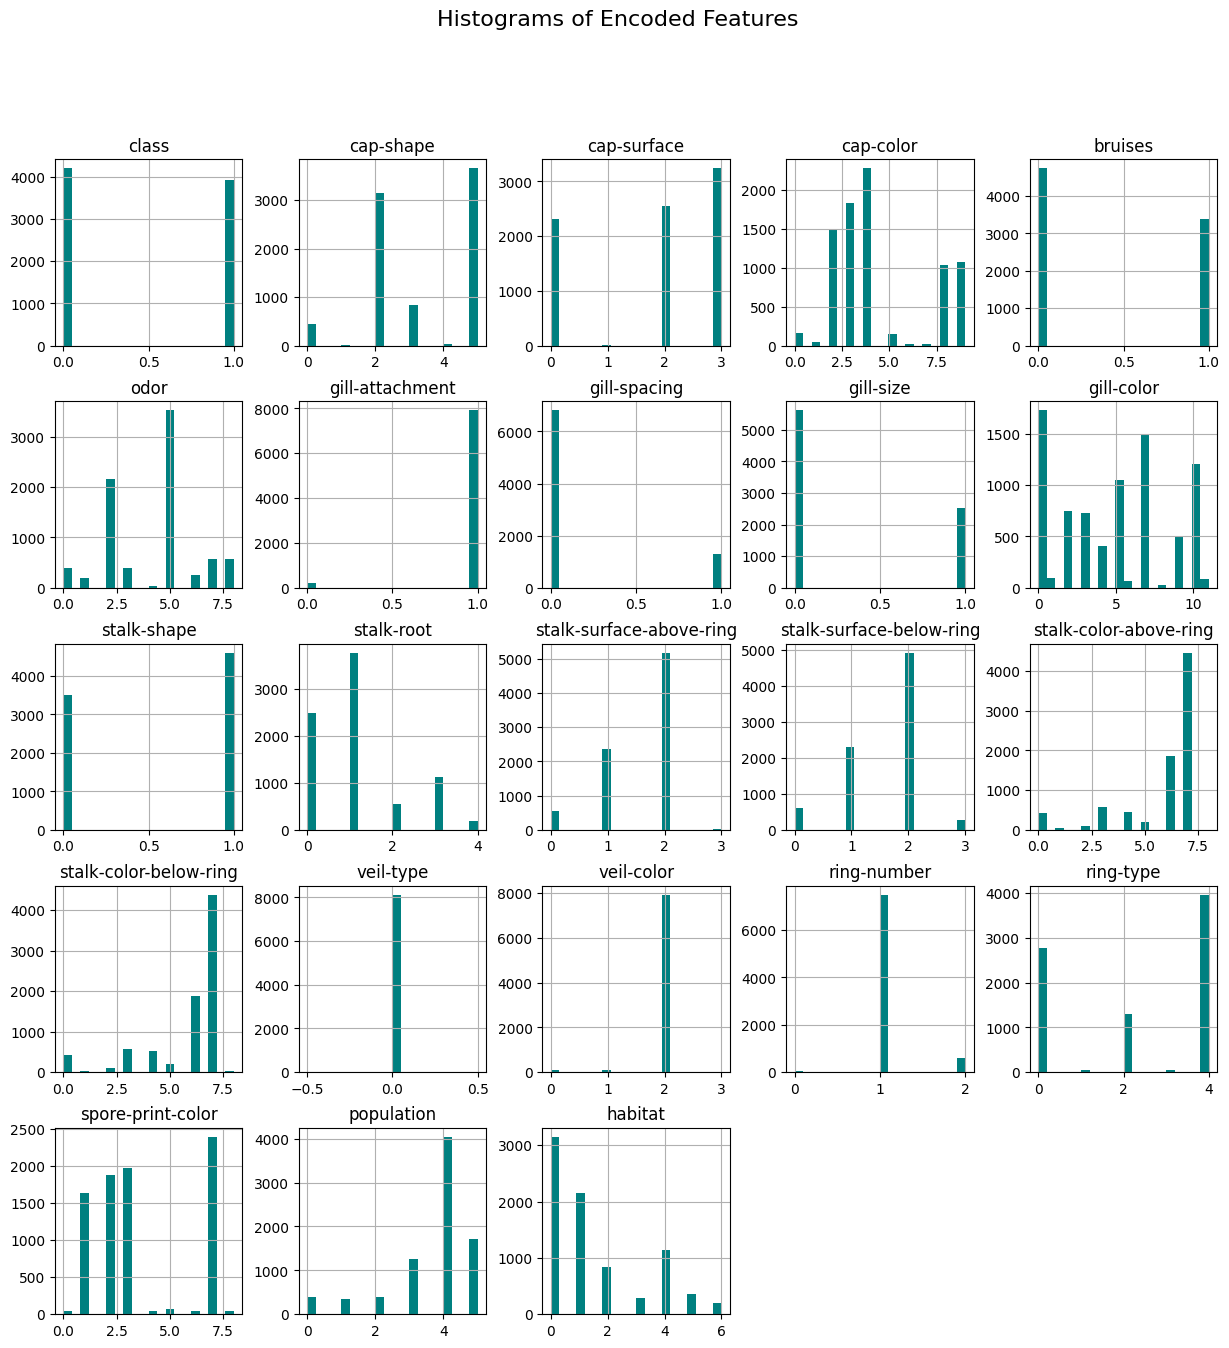

In [19]:
# Assuming encoded_data is the dataset with numeric values
encoded_data.hist(bins=20, figsize=(15, 15), color='teal')
plt.suptitle("Histograms of Encoded Features", fontsize=16)
plt.show()


#Summary Statistics
  Display the frequency of each unique value for categorical columns.

  Analyze the count, mean, mode, etc., if any numeric features exist


In [16]:
# Frequency of unique values for each categorical column
for column in df.columns:
    print(f"\nValue counts for {column}:")
    print(df[column].value_counts())



Value counts for class:
class
e    4208
p    3916
Name: count, dtype: int64

Value counts for cap-shape:
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

Value counts for cap-surface:
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

Value counts for cap-color:
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

Value counts for bruises:
bruises
f    4748
t    3376
Name: count, dtype: int64

Value counts for odor:
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

Value counts for gill-attachment:
gill-attachment
f    7914
a     210
Name: count, dtype: int64

Value counts for gill-spacing:
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

Value counts for gill-size:
gill-size
b    5612
n    2512
Name: count, dtype: int64

Value counts for gill-co

In [28]:
print(encoded_df.dtypes)


class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object


In [29]:
correlation_matrix = encoded_df.corr()
print(correlation_matrix)


                             class  cap-shape  cap-surface  cap-color  \
class                     1.000000   0.052951     0.178446  -0.031384   
cap-shape                 0.052951   1.000000    -0.050454  -0.048203   
cap-surface               0.178446  -0.050454     1.000000  -0.019402   
cap-color                -0.031384  -0.048203    -0.019402   1.000000   
bruises                  -0.501530  -0.035374     0.070228  -0.000764   
odor                     -0.093552  -0.021935     0.045233  -0.387121   
gill-attachment           0.129200   0.078865    -0.034180   0.041436   
gill-spacing             -0.348387   0.013196    -0.282306   0.144259   
gill-size                 0.540024   0.054050     0.208100  -0.169464   
gill-color               -0.530566  -0.006039    -0.161017   0.084659   
stalk-shape              -0.102019   0.063794    -0.014123  -0.456496   
stalk-root               -0.379361   0.030191    -0.126245   0.321274   
stalk-surface-above-ring -0.334593  -0.030417     0

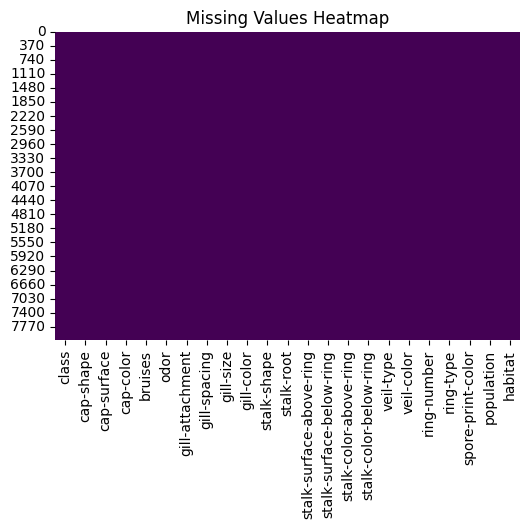

In [30]:
# Visualize missing values
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


### **Pairwise Relationships**

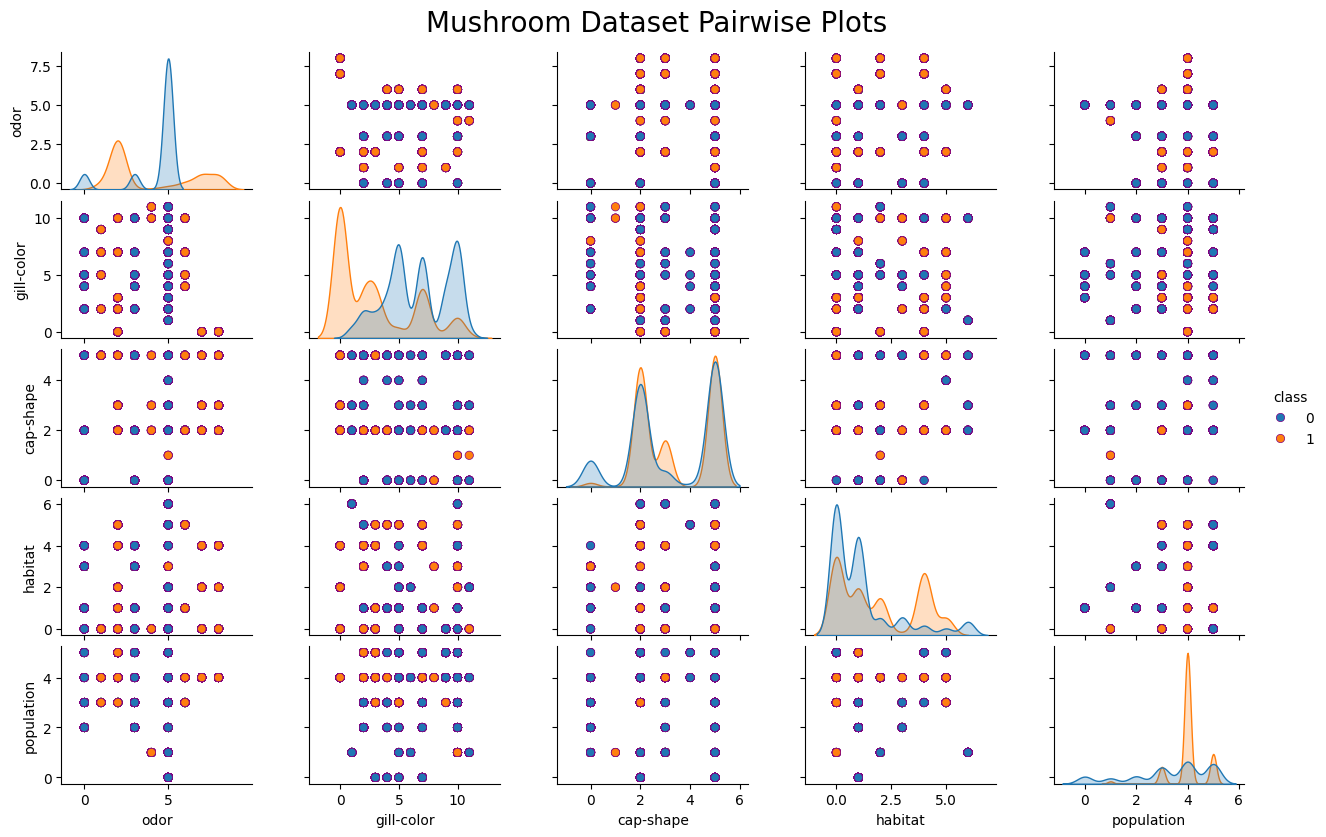

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
encoded_data = df.copy()
label_encoders = {}
for column in encoded_data.columns:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(encoded_data[column])
    label_encoders[column] = le

# Choose relevant features for pairplot
selected_features = ['class', 'odor', 'gill-color', 'cap-shape', 'habitat', 'population']

# Pairplot with hue based on the target variable (class)
pp = sns.pairplot(
    encoded_data[selected_features],
    hue='class',
    height=1.7,
    aspect=1.5,
    plot_kws=dict(edgecolor="purple", linewidth=0.5)
)

# Adjust the layout and add a title
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Mushroom Dataset Pairwise Plots', fontsize=20)
plt.show()


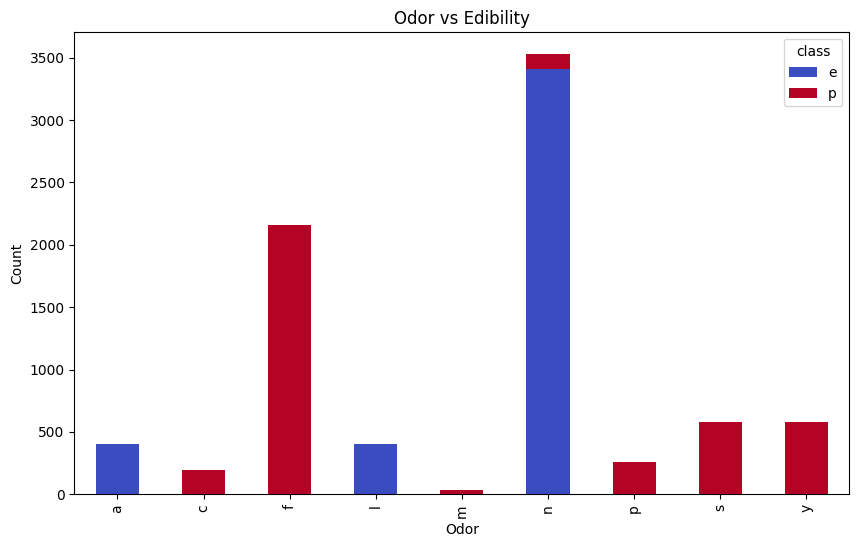

In [31]:
#Stacked Bar Chart for Feature Relationships:
odor_vs_class = df.groupby(['odor', 'class']).size().unstack()
odor_vs_class.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Odor vs Edibility")
plt.ylabel("Count")
plt.xlabel("Odor")
plt.show()


### **Heatmap of Odor vs. Habitat**

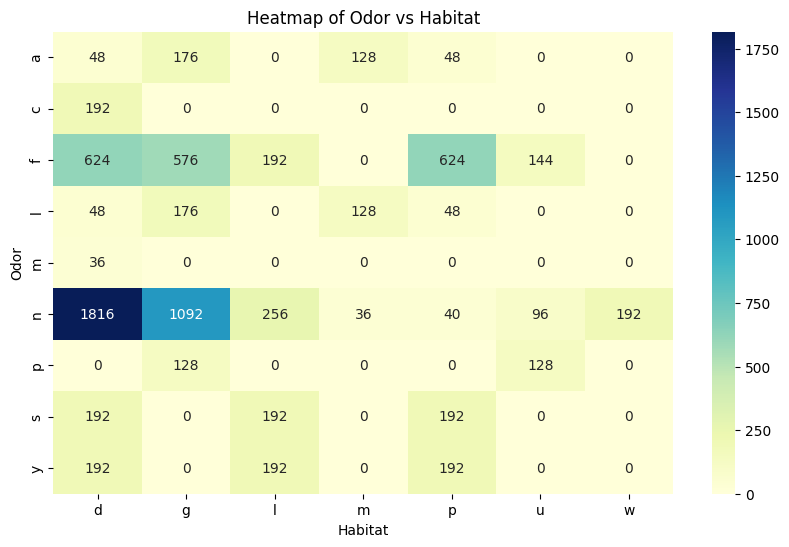

In [32]:
#Heatmap for Frequency:
odor_habitat = pd.crosstab(df['odor'], df['habitat'])
plt.figure(figsize=(10, 6))
sns.heatmap(odor_habitat, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Odor vs Habitat")
plt.xlabel("Habitat")
plt.ylabel("Odor")
plt.show()

### **Violin Plot**    

Visualize the distribution of a feature for each class

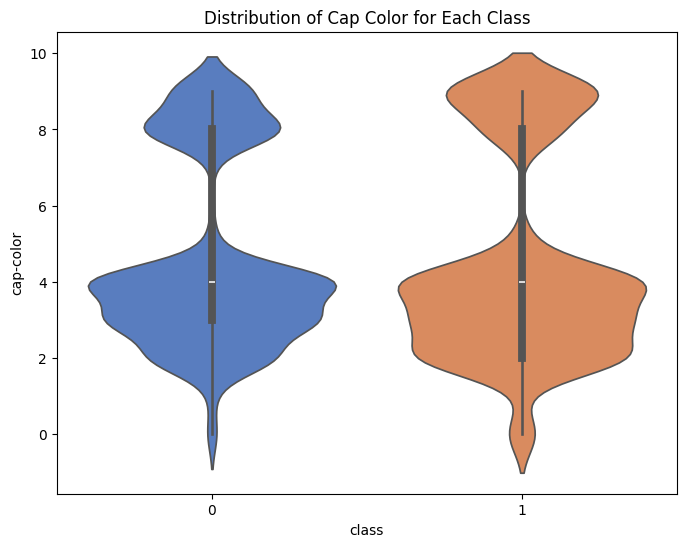

In [34]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='class', y=encoded_data['cap-color'], data=encoded_data, palette='muted')
plt.title("Distribution of Cap Color for Each Class")
plt.show()

#### **Correlation Heatmap**

This will help identifying features that are highly correlated. Features with a correlation close to 1 or -1 might indicate redundancy, meaning one feature can be removed without losing significant information.

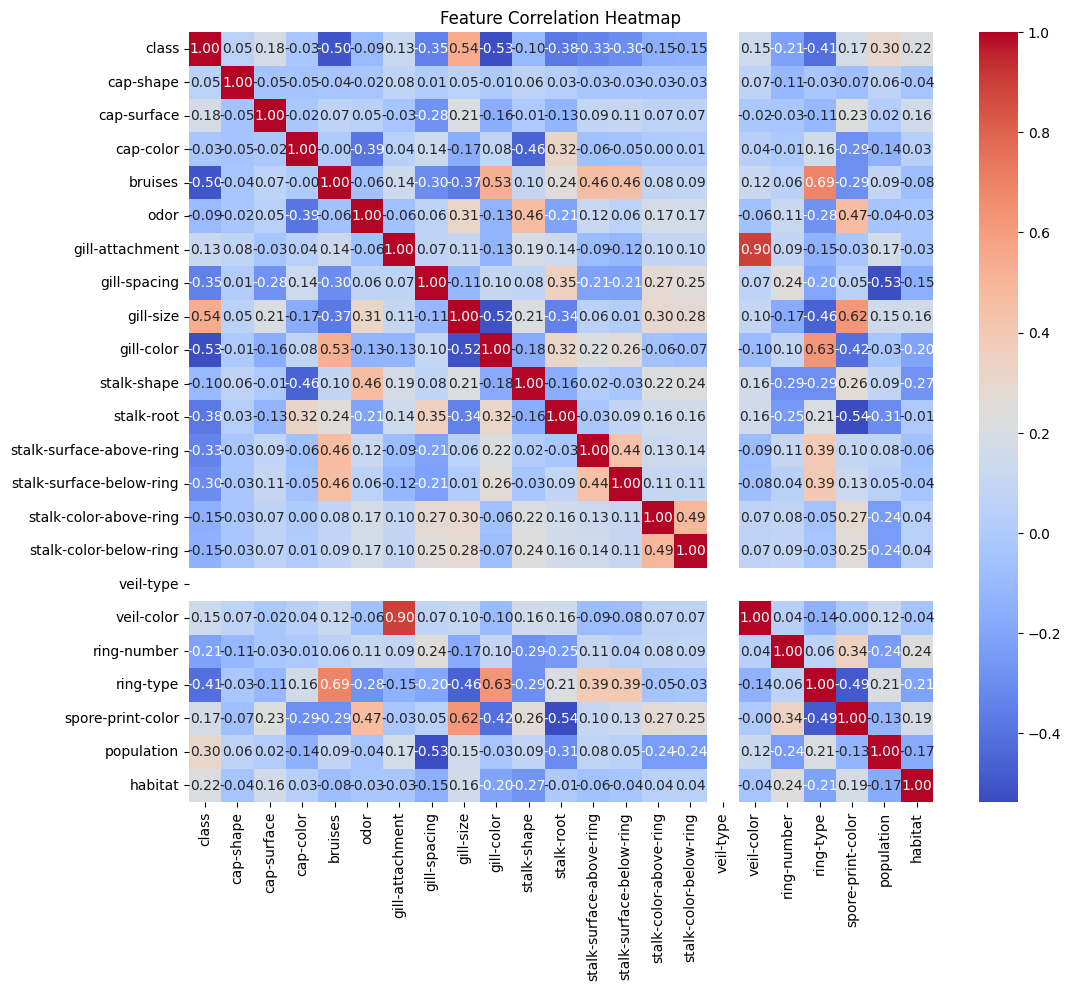

Highly Correlated Features (Threshold > 0.8):
                          class  cap-shape  cap-surface  cap-color  bruises  \
class                       1.0        NaN          NaN        NaN      NaN   
cap-shape                   NaN        1.0          NaN        NaN      NaN   
cap-surface                 NaN        NaN          1.0        NaN      NaN   
cap-color                   NaN        NaN          NaN        1.0      NaN   
bruises                     NaN        NaN          NaN        NaN      1.0   
odor                        NaN        NaN          NaN        NaN      NaN   
gill-attachment             NaN        NaN          NaN        NaN      NaN   
gill-spacing                NaN        NaN          NaN        NaN      NaN   
gill-size                   NaN        NaN          NaN        NaN      NaN   
gill-color                  NaN        NaN          NaN        NaN      NaN   
stalk-shape                 NaN        NaN          NaN        NaN      NaN   
stalk-

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(encoded_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify high correlations (absolute value > 0.8)
correlation_matrix = encoded_data.corr().abs()
high_correlation = correlation_matrix[correlation_matrix > 0.8]
print("Highly Correlated Features (Threshold > 0.8):")
print(high_correlation)

### **Section 2: Data Cleaning and Feature Engineering**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Check for missing values
print("Missing Values in Dataset:")
print(df.isnull().sum())

# Encode categorical variables
X = df.drop('class', axis=1)
y = df['class']
label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le




Missing Values in Dataset:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


### **Duplicates**

In [37]:
print(f"Duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)


Duplicate rows: 0


In [41]:
X =df.drop('class', axis=1)
y =df['class']

#### **Train Test Split**

In [30]:
# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **Model Training**

### **Logistic Regression**

In [38]:
# Initialize Logistic Regression
LR = LogisticRegression(random_state=42, max_iter=1000)

In [39]:
# Fit the model
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [40]:
# Predict on training and testing data
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

### **Performance Evaluation**

In [41]:
# Performance Evaluation
print("=== Logistic Regression Classification Report (Training) ===")
print(classification_report(y_train, y_train_pred))
print("=== Logistic Regression Classification Report (Testing) ===")
print(classification_report(y_test, y_test_pred))

=== Logistic Regression Classification Report (Training) ===
              precision    recall  f1-score   support

           e       0.94      0.96      0.95      3366
           p       0.95      0.94      0.95      3133

    accuracy                           0.95      6499
   macro avg       0.95      0.95      0.95      6499
weighted avg       0.95      0.95      0.95      6499

=== Logistic Regression Classification Report (Testing) ===
              precision    recall  f1-score   support

           e       0.95      0.96      0.96       842
           p       0.96      0.95      0.95       783

    accuracy                           0.96      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.96      0.96      0.96      1625



### **ROC Curve**

In [49]:
# Calculate AUC for training
fpr_train, tpr_train, _ = roc_curve(y_train_encoded, y_train_prob[:, 1], pos_label=1)
auc_train = auc(fpr_train, tpr_train)

In [47]:
# ROC Curve
y_train_prob = LR.predict_proba(X_train)
y_test_prob = LR.predict_proba(X_test)

In [48]:
# Calculate AUC Scores
Auc_train = roc_auc_score(y_train, y_train_prob[:, 1])
Auc_test = roc_auc_score(y_test, y_test_prob[:, 1])
print(f"Training AUC: {Auc_train:.4f}")
print(f"Testing AUC: {Auc_test:.4f}")

Training AUC: 0.9831
Testing AUC: 0.9821


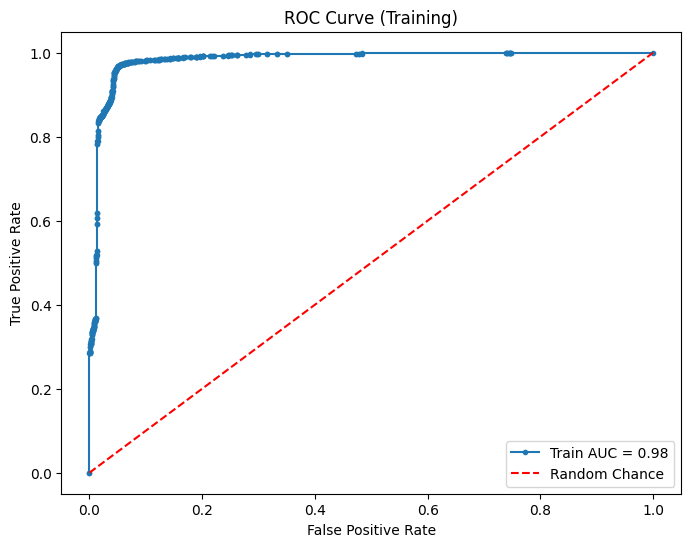

In [51]:
# Plot ROC Curve for Training
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.2f}", marker=".")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Training)")
plt.legend()
plt.show()

In [53]:
# Calculate AUC for testing
fpr_test, tpr_test, _ = roc_curve(y_test_encoded, y_test_prob[:, 1], pos_label=1)
auc_test = auc(fpr_test, tpr_test)


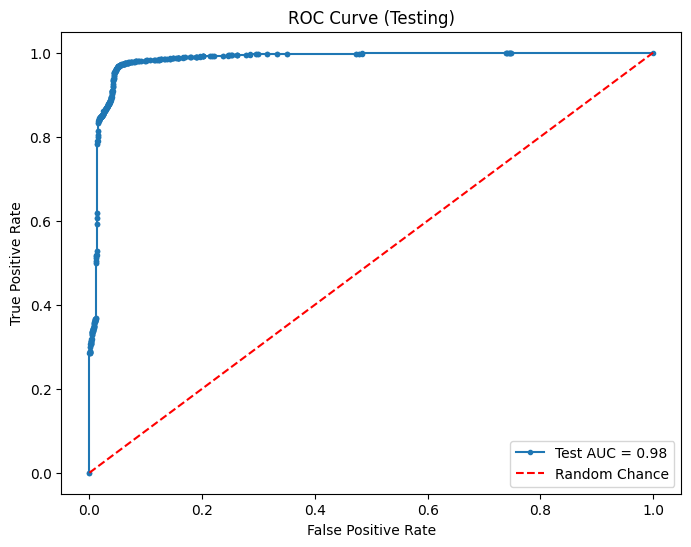

In [54]:
# Plot ROC Curve for Testing
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Test AUC = {auc_test:.2f}", marker=".")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Testing)")
plt.legend()
plt.show()

### **Hyperparameter Tuning**

In [57]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
LR_gcv = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=1000), param_grid=param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)
LR_gcv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1', verbose=2)

In [58]:
# Best Model and Parameters
best_model = LR_gcv.best_estimator_
best_params = LR_gcv.best_params_
print("Best Parameters for Logistic Regression:", best_params)

Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}


In [60]:
# Re-evaluate Best Model
y_train_pred_cv = best_model.predict(X_train)
y_test_pred_cv = best_model.predict(X_test)
print("=== Best Logistic Regression Classification Report (Training) ===")
print(classification_report(y_train, y_train_pred_cv))
print("=== Best Logistic Regression Classification Report (Testing) ===")
print(classification_report(y_test, y_test_pred_cv))

=== Best Logistic Regression Classification Report (Training) ===
              precision    recall  f1-score   support

           e       0.92      0.96      0.94      3366
           p       0.95      0.91      0.93      3133

    accuracy                           0.94      6499
   macro avg       0.94      0.93      0.94      6499
weighted avg       0.94      0.94      0.94      6499

=== Best Logistic Regression Classification Report (Testing) ===
              precision    recall  f1-score   support

           e       0.92      0.96      0.94       842
           p       0.96      0.91      0.93       783

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



### **Decision Tree**

In [62]:
# Fit the model
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [63]:
# Predict on training and testing data
y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)

In [ ]:
# Performance Evaluation
print("=== Decision Tree Classification Report (Training) ===")
print(classification_report(y_train, y_train_pred))
print("=== Decision Tree Classification Report (Testing) ===")
print(classification_report(y_test, y_test_pred))

In [61]:
# Initialize Decision Tree Classifier
DT = DecisionTreeClassifier(random_state=42)

### **Performance Evaluation**

In [64]:
# Performance Evaluation
print("=== Decision Tree Classification Report (Training) ===")
print(classification_report(y_train, y_train_pred))
print("=== Decision Tree Classification Report (Testing) ===")
print(classification_report(y_test, y_test_pred))

=== Decision Tree Classification Report (Training) ===
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      3366
           p       1.00      1.00      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

=== Decision Tree Classification Report (Testing) ===
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### **ROC Curve**

In [65]:
# ROC Curve
y_train_prob = DT.predict_proba(X_train)
y_test_prob = DT.predict_proba(X_test)

In [66]:
# Calculate AUC Scores
Auc_train = roc_auc_score(y_train, y_train_prob[:, 1])
Auc_test = roc_auc_score(y_test, y_test_prob[:, 1])
print(f"Training AUC: {Auc_train:.4f}")
print(f"Testing AUC: {Auc_test:.4f}")

Training AUC: 1.0000
Testing AUC: 1.0000


In [67]:
# Calculate AUC for training
fpr_train, tpr_train, _ = roc_curve(y_train_encoded, y_train_prob[:, 1], pos_label=1)
auc_train = auc(fpr_train, tpr_train)

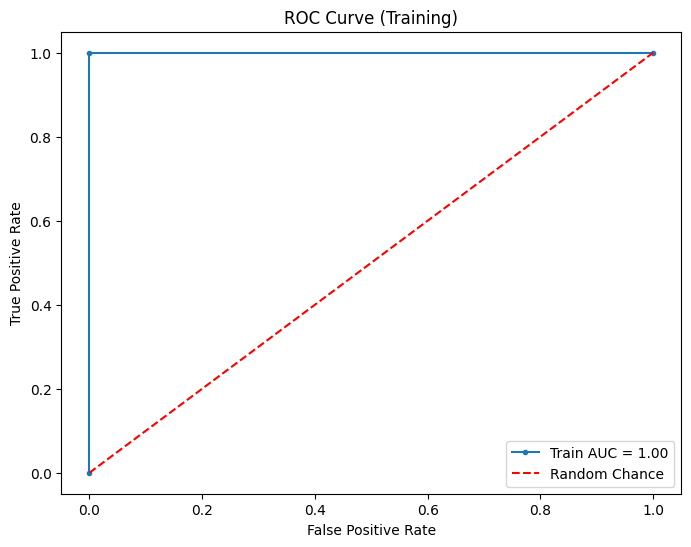

In [68]:
# Plot ROC Curve for Training
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.2f}", marker=".")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Training)")
plt.legend()
plt.show()

In [69]:
# Calculate AUC for testing
fpr_test, tpr_test, _ = roc_curve(y_test_encoded, y_test_prob[:, 1], pos_label=1)
auc_test = auc(fpr_test, tpr_test)

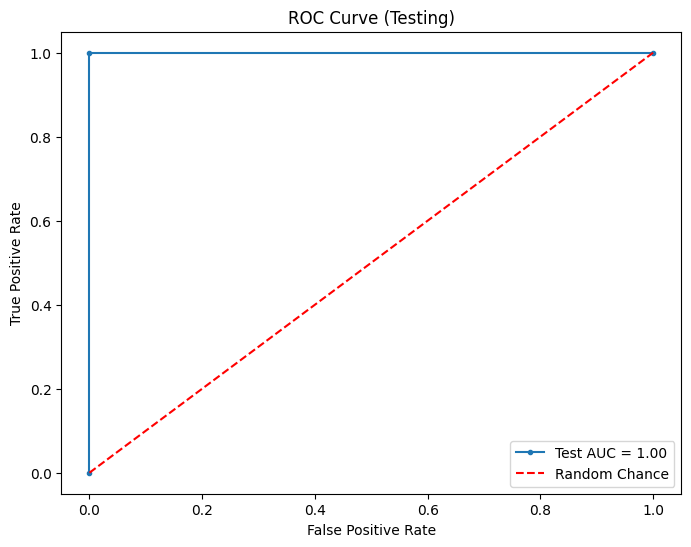

In [70]:
# Plot ROC Curve for Testing
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Test AUC = {auc_test:.2f}", marker=".")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Testing)")
plt.legend()
plt.show()

### **Hyperparameter Tuning**

In [71]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [72]:
DT_gcv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)
DT_gcv.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=2)

In [73]:
# Best Model and Parameters
best_model = DT_gcv.best_estimator_
best_params = DT_gcv.best_params_
print("Best Parameters for Decision Tree:", best_params)

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [74]:
# Re-evaluate Best Model
y_train_pred_cv = best_model.predict(X_train)
y_test_pred_cv = best_model.predict(X_test)
print("=== Best Decision Tree Classification Report (Training) ===")
print(classification_report(y_train, y_train_pred_cv))
print("=== Best Decision Tree Classification Report (Testing) ===")
print(classification_report(y_test, y_test_pred_cv))

=== Best Decision Tree Classification Report (Training) ===
              precision    recall  f1-score   support

           e       0.99      0.97      0.98      3366
           p       0.97      0.99      0.98      3133

    accuracy                           0.98      6499
   macro avg       0.98      0.98      0.98      6499
weighted avg       0.98      0.98      0.98      6499

=== Best Decision Tree Classification Report (Testing) ===
              precision    recall  f1-score   support

           e       0.99      0.97      0.98       842
           p       0.97      0.99      0.98       783

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



### **SVM Model**

In [75]:
# Initialize SVM
SVM = SVC(kernel='linear', probability=True, random_state=42)

In [76]:
# Fit the model
SVM.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [77]:
# Predict on training and testing data
y_train_pred = SVM.predict(X_train)
y_test_pred = SVM.predict(X_test)

### **Performance Evaluation**

In [78]:
# Performance Evaluation
print("=== SVM Classification Report (Training) ===")
print(classification_report(y_train, y_train_pred))
print("=== SVM Classification Report (Testing) ===")
print(classification_report(y_test, y_test_pred))

=== SVM Classification Report (Training) ===
              precision    recall  f1-score   support

           e       0.98      0.98      0.98      3366
           p       0.98      0.97      0.98      3133

    accuracy                           0.98      6499
   macro avg       0.98      0.98      0.98      6499
weighted avg       0.98      0.98      0.98      6499

=== SVM Classification Report (Testing) ===
              precision    recall  f1-score   support

           e       0.98      0.98      0.98       842
           p       0.98      0.98      0.98       783

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



### **ROC Curve**

In [79]:
# ROC Curve
y_train_prob = SVM.predict_proba(X_train)
y_test_prob = SVM.predict_proba(X_test)

In [80]:
# Calculate AUC Scores
Auc_train = roc_auc_score(y_train, y_train_prob[:, 1])
Auc_test = roc_auc_score(y_test, y_test_prob[:, 1])
print(f"Training AUC: {Auc_train:.4f}")
print(f"Testing AUC: {Auc_test:.4f}")

Training AUC: 0.9856
Testing AUC: 0.9834


In [81]:
# Calculate AUC for training
fpr_train, tpr_train, _ = roc_curve(y_train_encoded, y_train_prob[:, 1], pos_label=1)
auc_train = auc(fpr_train, tpr_train)

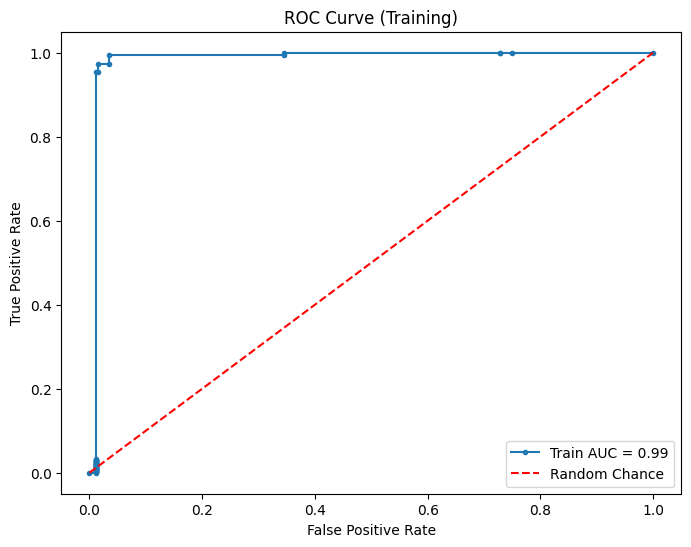

In [82]:
# Plot ROC Curve for Training
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.2f}", marker=".")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Training)")
plt.legend()
plt.show()

In [83]:
# Calculate AUC for testing
fpr_test, tpr_test, _ = roc_curve(y_test_encoded, y_test_prob[:, 1], pos_label=1)
auc_test = auc(fpr_test, tpr_test)

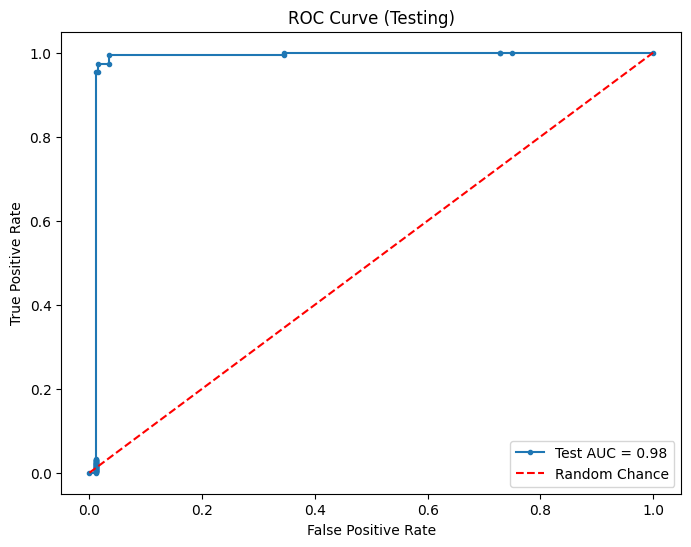

In [84]:
# Plot ROC Curve for Testing
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Test AUC = {auc_test:.2f}", marker=".")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Testing)")
plt.legend()
plt.show()

### **Hyperparametr Tuning**

In [85]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
SVM_gcv = GridSearchCV(estimator=SVC(probability=True, random_state=42), param_grid=param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)
SVM_gcv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1', verbose=2)

In [86]:
# Best Model and Parameters
best_model = SVM_gcv.best_estimator_
best_params = SVM_gcv.best_params_
print("Best Parameters for SVM:", best_params)

Best Parameters for SVM: {'C': 0.1, 'kernel': 'linear'}


In [87]:
# Re-evaluate Best Model
y_train_pred_cv = best_model.predict(X_train)
y_test_pred_cv = best_model.predict(X_test)
print("=== Best SVM Classification Report (Training) ===")
print(classification_report(y_train, y_train_pred_cv))
print("=== Best SVM Classification Report (Testing) ===")
print(classification_report(y_test, y_test_pred_cv))

=== Best SVM Classification Report (Training) ===
              precision    recall  f1-score   support

           e       0.93      0.96      0.95      3366
           p       0.95      0.93      0.94      3133

    accuracy                           0.94      6499
   macro avg       0.94      0.94      0.94      6499
weighted avg       0.94      0.94      0.94      6499

=== Best SVM Classification Report (Testing) ===
              precision    recall  f1-score   support

           e       0.94      0.96      0.95       842
           p       0.96      0.94      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



### **Final Camparison of Models**

In [89]:
# Final Comparison
results = {
    "Model": ["Decision Tree", "Logistic Regression", "SVM"],
    "Best Parameters": [
         DT_gcv.best_params_,
        LR_gcv.best_params_,
        SVM_gcv.best_params_,
    ],
    "Test Accuracy": [
        accuracy_score(y_test, DT_gcv.best_estimator_.predict(X_test)),
        accuracy_score(y_test, LR_gcv.best_estimator_.predict(X_test)),
        accuracy_score(y_test, SVM_gcv.best_estimator_.predict(X_test)),
    ],
}

comparison_df = pd.DataFrame(results)
print("\n=== Model Performance Comparison ===")
print(comparison_df)


=== Model Performance Comparison ===
                 Model                                    Best Parameters  \
0        Decision Tree  {'criterion': 'gini', 'max_depth': 4, 'min_sam...   
1  Logistic Regression                  {'C': 0.1, 'solver': 'liblinear'}   
2                  SVM                     {'C': 0.1, 'kernel': 'linear'}   

   Test Accuracy  
0       0.982154  
1       0.937846  
2       0.948923  


In [90]:
pip install tabulate


In [92]:
from tabulate import tabulate

# Print table with tabulate
print(tabulate(comparison_df, headers='keys', tablefmt='grid'))

+----+---------------------+--------------------------------------------------------------------------------------+-----------------+
|    | Model               | Best Parameters                                                                      |   Test Accuracy |
+====+=====================+======================================================================================+=================+
|  0 | Decision Tree       | {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2} |        0.982154 |
+----+---------------------+--------------------------------------------------------------------------------------+-----------------+
|  1 | Logistic Regression | {'C': 0.1, 'solver': 'liblinear'}                                                    |        0.937846 |
+----+---------------------+--------------------------------------------------------------------------------------+-----------------+
|  2 | SVM                 | {'C': 0.1, 'kernel': 'linear'}   